In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [38]:
df = pd.read_csv(r"C:\Users\Rayan\Downloads\home.csv")

# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [39]:
from sklearn.preprocessing import LabelEncoder
encode_address = LabelEncoder()
df['Address'] = encode_address.fit_transform(df['Address'])
encode_address = LabelEncoder()
df['Parking'] = encode_address.fit_transform(df['Parking'])
encode_address = LabelEncoder()
df['Elevator'] = encode_address.fit_transform(df['Elevator'])
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,True,1,156,1.850000e+09,61666.67
1,60,1,1,True,1,156,1.850000e+09,61666.67
2,79,2,1,True,1,117,5.500000e+08,18333.33
3,95,2,1,True,1,152,9.025000e+08,30083.33
4,123,2,1,True,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,True,1,163,3.500000e+09,116666.67
3475,83,2,1,True,1,105,6.800000e+09,226666.67
3476,75,2,0,False,0,115,3.650000e+08,12166.67
3477,105,2,1,True,1,39,5.600000e+09,186666.67


In [40]:
df['Area'] = df['Area'].replace([' ',','],'',regex=True)
df['Area'] = df['Area'].astype(np.int64)
df = df[df['Area'] < 2000]
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,True,1,156,1.850000e+09,61666.67
1,60,1,1,True,1,156,1.850000e+09,61666.67
2,79,2,1,True,1,117,5.500000e+08,18333.33
3,95,2,1,True,1,152,9.025000e+08,30083.33
4,123,2,1,True,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,True,1,163,3.500000e+09,116666.67
3475,83,2,1,True,1,105,6.800000e+09,226666.67
3476,75,2,0,False,0,115,3.650000e+08,12166.67
3477,105,2,1,True,1,39,5.600000e+09,186666.67


In [41]:
cdf = df[['Area','Parking','Elevator','Address','Price' ]]
cdf.head(9)

,Area,Parking,Elevator,Address,Price
0,63,1,1,156,1.850000e+09
1,60,1,1,156,1.850000e+09
2,79,1,1,117,5.500000e+08
3,95,1,1,152,9.025000e+08
4,123,1,1,150,7.000000e+09
5,70,1,0,106,2.050000e+09
6,87,1,1,117,6.000000e+08
7,59,1,1,156,2.150000e+09
8,54,1,0,13,4.930000e+08


In [42]:
cdf.dropna()
cdf


,Area,Parking,Elevator,Address,Price
0,63,1,1,156,1.850000e+09
1,60,1,1,156,1.850000e+09
2,79,1,1,117,5.500000e+08
3,95,1,1,152,9.025000e+08
4,123,1,1,150,7.000000e+09
...,...,...,...,...,...
3474,86,1,1,163,3.500000e+09
3475,83,1,1,105,6.800000e+09
3476,75,0,0,115,3.650000e+08
3477,105,1,1,39,5.600000e+09


In [43]:
cdf.describe()


,Area,Parking,Elevator,Address,Price
count,3474.000000,3474.000000,3474.000000,3474.000000,3.474000e+03
mean,107.031664,0.848014,0.787277,105.553541,5.355095e+09
std,70.991973,0.359059,0.409292,50.657260,8.102939e+09
min,30.000000,0.000000,0.000000,0.000000,3.600000e+06
25%,69.000000,1.000000,1.000000,62.000000,1.415625e+09
50%,90.000000,1.000000,1.000000,117.000000,2.885850e+09
75%,120.000000,1.000000,1.000000,146.000000,6.000000e+09
max,1000.000000,1.000000,1.000000,192.000000,9.240000e+10


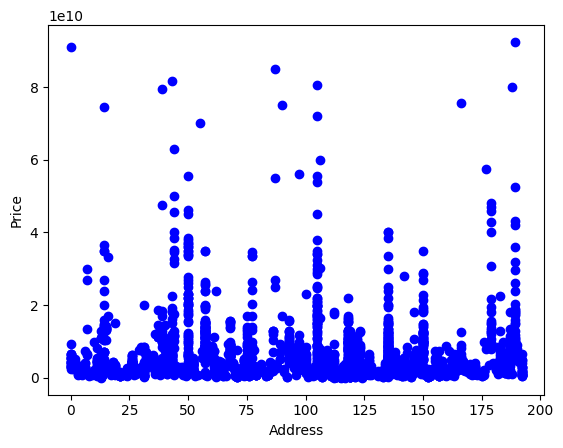

In [44]:
plt.scatter(cdf.Address, cdf.Price, color='blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

In [45]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

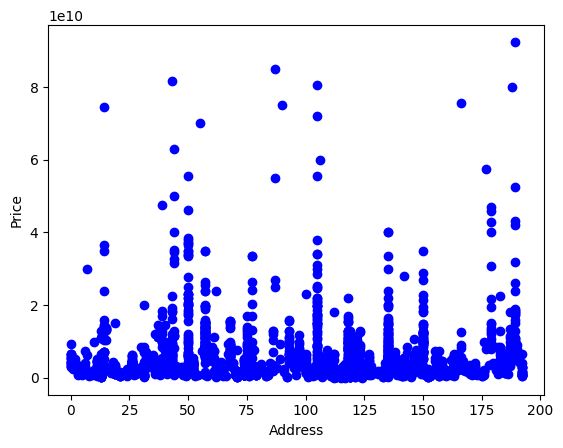

In [46]:
plt.scatter(train.Address, train.Price,  color='blue')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Address','Area','Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[2.28110114e+06 7.65244509e+07 1.79423135e+09]]


In [48]:
y_hat= regr.predict(test[['Address','Area','Elevator']])
x = np.asanyarray(test[['Address','Area','Elevator']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 30795595841690980352.00
Variance score: 0.57


C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
